In [1]:
from surface_code_routing.dag import DAG
from surface_code_routing.instructions import INIT, CNOT, MEAS, X, Hadamard
from surface_code_routing.synth_instructions import Z_theta
from surface_code_routing.lib_instructions import T_Factory, T, Toffoli, T_gate
from surface_code_routing.symbol import Symbol
from surface_code_routing.compiled_qcb import compile_qcb

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sbs
import numpy as np
sbs.set_context("paper")
sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
import sys


def arbitrary_rot(p, q, width, height, precision=10, verbose=False, t_factory=None):
    if t_factory is None:
        t_factory = T_Factory()
        
    gate = T_gate(factory=t_factory)
    
    dag = DAG(f'rot_{width}_{height}')
    dag.add_gate(INIT('q_0'))
    dag.add_gate(Z_theta(p, q, precision=precision, T=gate)(f'q_0'))
    return compile_qcb(dag, width, height, factory, verbose=verbose) 

prec = 256

In [2]:
def plt_data(condition, x_axis, y_axis, target=None):
    data = filter(lambda x: x[0] == target, zip(condition, x_axis, y_axis))
    x = []
    y = []
    for _, x_val, y_val in data:
        x.append(x_val)
        y.append(y_val)
    return {'x':x, 'y':y}   

In [3]:
factory = T_Factory()


In [4]:
print("QCB Size, Register Size, Cycles, Volume")

results = {'size': [], 'runtime':[], 'volume':[], 'delay':[], 'angle':[]}
qcb_sizes = [8, 12, 16, 32, 48]
rotations = list(range(1, prec))

factory = T_Factory()

for qcb_size in qcb_sizes:
    for i in rotations:
            print(f"\r {qcb_size} : {i}" + " " * 5, flush=True, end='')
            qcb = arbitrary_rot(i, prec, qcb_size, qcb_size, t_factory=factory)
            results['size'].append(qcb_size)
            results['angle'].append(i)
            results['runtime'].append(qcb.n_cycles())
            results['volume'].append(qcb.space_time_volume())
            results['delay'].append(qcb.delays())

results_l1 = results

QCB Size, Register Size, Cycles, Volume
 48 : 255     

Text(0, 0.5, 'Space-Time Volume')

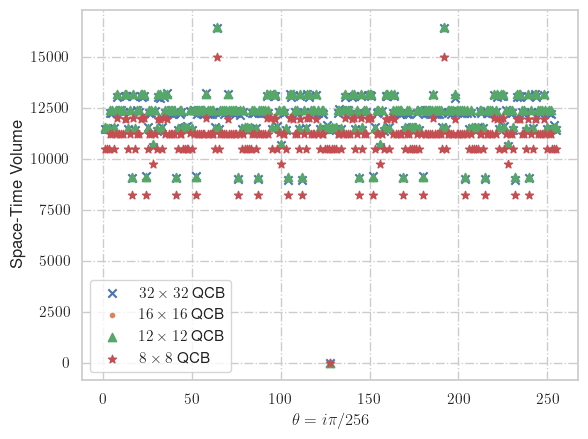

In [11]:
styles = {8:{'marker':'*'},
 12: {'marker':'^'},
 16: {'marker':'.'},
 32: {'marker':'x'}
}

for i in qcb_sizes[:-1][::-1]:
    plt.scatter(**plt_data(results['size'], results['angle'], results['volume'], target=i), **styles[i], label=f'${i} \\times {i}$ QCB')

plt.legend()
plt.xlabel('$\\theta = {n} \\pi  / {256}$')
plt.ylabel('Space-Time Volume')

In [9]:
qcb_sizes[

[8, 12, 16, 32, 48]

Text(0, 0.5, 'Cycles')

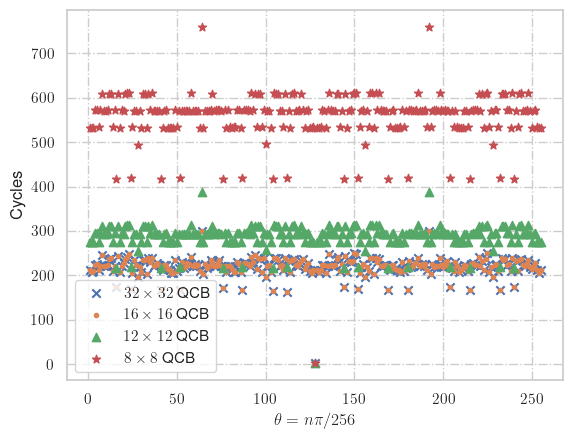

In [13]:
for i in qcb_sizes[:-1][::-1]:
    plt.scatter(**plt_data(results['size'], results['angle'], results['runtime'], target=i), **styles[i], label=f'${i} \\times {i}$ QCB')

plt.legend()
plt.xlabel('$\\theta = {n} \\pi  / {256}$')
plt.ylabel('Cycles')

Text(0.5, 0.01, '$\\theta = {n} \\pi  / {256}$')

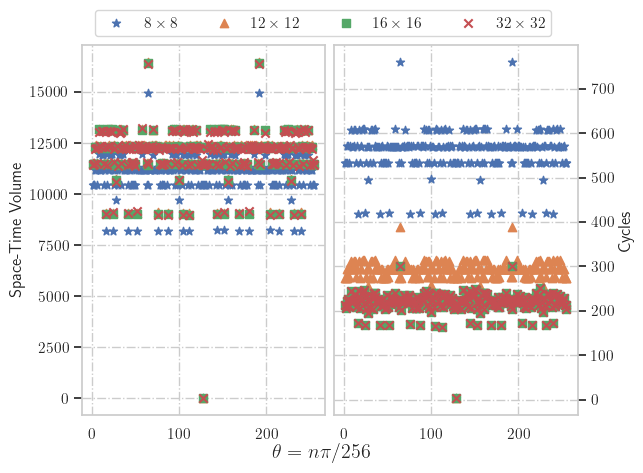

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

styles = {8:{'marker':'*'},
 12: {'marker':'^'},
 16: {'marker':'s'},
 32: {'marker':'x'}
}

targets = qcb_sizes[:-1]

#f, ax = plt.subplots(figsize=(7, 7))


sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#plt.grid(True,which="both")  


marks = ['', '.', 'x', '*']
linestyles = ['-', '--', ':']

target_label = 'distillation'
dependent = 'volume'
independent = 'height'
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

ax = [
    plt.subplot2grid((5, 10), (0, 0), colspan=5, rowspan=5),
    plt.subplot2grid((5, 10), (0, 5), colspan=5, rowspan=5)
]

subplot = ax[0]
kwargs = {
'errorbar':('ci', 100)
}

for i in targets:
    subplot.scatter(**plt_data(results_l1['size'], results_l1['angle'], results_l1['volume'], target=i), **styles[i], label=f'${i} \\times {i}$ QCB')

#subplot.legend_.remove()
subplot.yaxis.set_label_position("left")
subplot.yaxis.tick_left()
#subplot.set_yscale('log')
subplot.set_ylabel('Space-Time Volume')

# subplot.tick_params(
#     axis='x',
#     bottom=False,
#     top=False,
#     labelbottom=False
# )

subplot = ax[1]

for i in targets:
    subplot.scatter(**plt_data(results_l1['size'], results_l1['angle'], results_l1['runtime'], target=i), **styles[i], label=f'${i} \\times {i}$')

    
#subplot.legend_.remove()
subplot.yaxis.set_label_position("right")
subplot.yaxis.tick_right()
#subplot.set_yscale('log')
subplot.set_ylabel('Cycles')


fig = plt.gcf()
#fig.set_size_inches(7, 7)

lines = linestyles * 3
labels = sum(([f'DAG$_{target}$', f'Extern$_{target}$', f'CCZ$_{target}$'] for target in range(3)), start=list())

handles, labels = subplot.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper left', bbox_to_anchor=(0.134, 0.97), ncol=4)

fig.supxlabel('$\\theta = {n} \\pi  / {256}$')



#sbs.lineplot(x=results_extern['n_ctrl'], y=results_extern['volume'], label="Toffoli Extern")
#sbs.lineplot(x=results_ccz['n_ctrl'], y=results_ccz['volume'], label='Toffoli Factory', **ccz_style, marker='^')


#plt.title('Toffoli Runtimes for Various QCB Sizes')
#plt.xlabel('C$^{n}$X')
#plt.ylabel('Space-Time Volume')

#plt.yscale('log')

#plt.legend()

#plt.savefig('rotations.pdf')

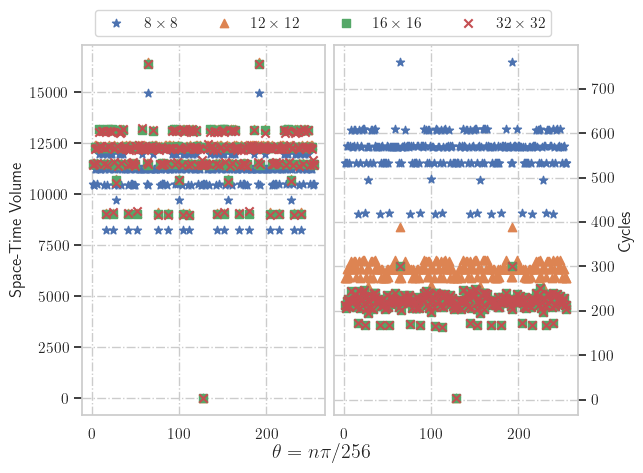

In [65]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

styles = {8:{'marker':'*'},
 12: {'marker':'^'},
 16: {'marker':'s'},
 32: {'marker':'x'}
}

targets = qcb_sizes[:-1]

#f, ax = plt.subplots(figsize=(7, 7))


sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#plt.grid(True,which="both")  


marks = ['', '.', 'x', '*']
linestyles = ['-', '--', ':']

target_label = 'distillation'
dependent = 'volume'
independent = 'height'
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

ax = [
    plt.subplot2grid((5, 10), (0, 0), colspan=5, rowspan=5),
    plt.subplot2grid((5, 10), (0, 5), colspan=5, rowspan=5)
]

subplot = ax[0]
kwargs = {
'errorbar':('ci', 100)
}

for i in targets:
    subplot.scatter(**plt_data(results_l1['size'], results_l1['angle'], results_l1['volume'], target=i), **styles[i], label=f'${i} \\times {i}$ QCB')

#subplot.legend_.remove()
subplot.yaxis.set_label_position("left")
subplot.yaxis.tick_left()
#subplot.set_yscale('log')
subplot.set_ylabel('Space-Time Volume')

# subplot.tick_params(
#     axis='x',
#     bottom=False,
#     top=False,
#     labelbottom=False
# )

subplot = ax[1]

for i in targets:
    subplot.scatter(**plt_data(results_l1['size'], results_l1['angle'], results_l1['runtime'], target=i), **styles[i], label=f'${i} \\times {i}$')

    
#subplot.legend_.remove()
subplot.yaxis.set_label_position("right")
subplot.yaxis.tick_right()
#subplot.set_yscale('log')
subplot.set_ylabel('Cycles')


fig = plt.gcf()
#fig.set_size_inches(7, 7)

lines = linestyles * 3
labels = sum(([f'DAG$_{target}$', f'Extern$_{target}$', f'CCZ$_{target}$'] for target in range(3)), start=list())

handles, labels = subplot.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper left', bbox_to_anchor=(0.134, 0.97), ncol=4)

fig.supxlabel('$\\theta = {n} \\pi  / {256}$')



#sbs.lineplot(x=results_extern['n_ctrl'], y=results_extern['volume'], label="Toffoli Extern")
#sbs.lineplot(x=results_ccz['n_ctrl'], y=results_ccz['volume'], label='Toffoli Factory', **ccz_style, marker='^')


#plt.title('Toffoli Runtimes for Various QCB Sizes')
#plt.xlabel('C$^{n}$X')
#plt.ylabel('Space-Time Volume')

#plt.yscale('log')

#plt.legend()

#plt.savefig('rotations.pdf')

In [5]:
from functools import partial
from surface_code_routing.lib_instructions import T_Factory, Toffoli, T_gate
import cnot_network

toff_height = 14
toff_width = toff_height

t_factory_l1 = T_Factory()
toffoli_gate = Toffoli

t_factory_l2 = T_Factory(t_factory_l1, height=8, width=10, t_gate=T_gate(t_factory_l1))
t_gate_l2 = T_gate(factory=t_factory_l2)

t_factory_l3 = T_Factory(t_factory_l2, height=11, width=12, t_gate=T_gate(t_factory_l2))
t_gate_l3 = T_gate(factory=t_factory_l3)

extern_toffoli_l1 = cnot_network.toffoli(toff_height, toff_width, t_factory=t_factory_l1)
extern_toffoli_l2 = cnot_network.toffoli(toff_height, toff_width, t_factory=t_factory_l2)
extern_toffoli_l3 = cnot_network.toffoli(toff_height, toff_width, t_factory=t_factory_l3)

# Raw T injection sites
ccz_factory_l1 = cnot_network.CCZ_factory(6, 4, t_factory=None)
ccz_factory_l2 = cnot_network.CCZ_factory(9, 7, t_factory=t_factory_l1)
ccz_factory_l3 = cnot_network.CCZ_factory(11, 11, t_factory=t_factory_l2)

t_factories = (t_factory_l1, t_factory_l2, t_factory_l3)
extern_toffolis = (extern_toffoli_l1, extern_toffoli_l2, extern_toffoli_l3)
ccz_factories = (ccz_factory_l1, ccz_factory_l2, ccz_factory_l3)

In [6]:
print("QCB Size, Register Size, Cycles, Volume")

results = {'size': [], 'runtime':[], 'volume':[] 'angle':[]}
qcb_sizes = [12, 16, 32, 48]
rotations = list(range(1, prec))

factory = t_factory_l2

for qcb_size in qcb_sizes:
    for i in rotations:
            print(f"\r {qcb_size} : {i}" + " " * 5, flush=True, end='')
            qcb = arbitrary_rot(i, prec, qcb_size, qcb_size, t_factory=factory)
            results['size'].append(qcb_size)
            results['angle'].append(i)
            results['runtime'].append(qcb.n_cycles())
            results['volume'].append(qcb.space_time_volume())

results_l2 = results

QCB Size, Register Size, Cycles, Volume
 48 : 255     

In [6]:
print("QCB Size, Register Size, Cycles, Volume")

results = {'size': [], 'runtime':[], 'volume':[], 'angle':[]}
qcb_sizes = [16, 32, 48, 64]
rotations = list(range(1, prec))

factory = t_factory_l3

for qcb_size in qcb_sizes:
    for i in rotations:
        print(f"\r {qcb_size} : {i}" + " " * 5, flush=True, end='')
        try:
            qcb = arbitrary_rot(i, prec, qcb_size, qcb_size, t_factory=factory)
            results['size'].append(qcb_size)
            results['angle'].append(i)
            results['runtime'].append(qcb.n_cycles())
            results['volume'].append(qcb.space_time_volume())
        except:
            pass

results_l3 = results

QCB Size, Register Size, Cycles, Volume
 64 : 255     

In [15]:
results_l2 = {'size': [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48], 'runtime': [8148, 8148, 8148, 8732, 8732, 8150, 8732, 9312, 8730, 8730, 8732, 9312, 9312, 8150, 8732, 6402, 9312, 8148, 8732, 8730, 9312, 9314, 9314, 6404, 8150, 8730, 8730, 7566, 8730, 8148, 9312, 9312, 8148, 9312, 8732, 9314, 8730, 8730, 8730, 8730, 6402, 8148, 8730, 8732, 8148, 8148, 8148, 8148, 8732, 8150, 8730, 6404, 8730, 8730, 8730, 8730, 8730, 9314, 8730, 8730, 8730, 8730, 8148, 11640, 8148, 8730, 8730, 8730, 8732, 9312, 8730, 8732, 8732, 8732, 8730, 6402, 8732, 8148, 8732, 8150, 8148, 8150, 8150, 8732, 8732, 8148, 6404, 8732, 8732, 8732, 8730, 9314, 8732, 9312, 8150, 9312, 9312, 8150, 8732, 7568, 8730, 8730, 8148, 6402, 9314, 9312, 9312, 8730, 8730, 8150, 9312, 6404, 8730, 8148, 9312, 9314, 8730, 8730, 8732, 9312, 8732, 8148, 8730, 8732, 8148, 8148, 8150, 3, 8148, 8148, 8150, 8732, 8730, 8148, 8732, 9314, 8732, 8730, 8730, 9312, 9312, 8150, 8730, 6402, 9312, 8148, 8730, 8732, 9312, 9314, 9314, 6404, 8150, 8730, 8732, 7566, 8730, 8150, 9314, 9314, 8148, 9314, 8732, 9314, 8732, 8730, 8730, 8730, 6402, 8150, 8730, 8732, 8148, 8148, 8148, 8150, 8732, 8150, 8730, 6404, 8732, 8732, 8730, 8730, 8732, 9314, 8730, 8730, 8730, 8732, 8150, 11640, 8150, 8730, 8732, 8732, 8730, 9314, 8732, 8730, 8732, 8730, 8730, 6404, 8730, 8150, 8730, 8150, 8148, 8148, 8148, 8730, 8730, 8150, 6402, 8730, 8732, 8732, 8732, 9312, 8730, 9312, 8148, 9312, 9314, 8150, 8730, 7566, 8732, 8732, 8150, 6404, 9312, 9312, 9312, 8732, 8732, 8148, 9314, 6402, 8730, 8150, 9312, 9314, 8730, 8730, 8732, 9314, 8730, 8148, 8730, 8732, 8150, 8148, 8148, 8148, 8148, 8148, 8732, 8732, 8150, 8732, 9312, 8730, 8730, 8732, 9312, 9312, 8150, 8732, 6402, 9312, 8148, 8732, 8730, 9312, 9314, 9314, 6404, 8150, 8730, 8730, 7566, 8730, 8148, 9312, 9312, 8148, 9312, 8732, 9314, 8730, 8730, 8730, 8730, 6402, 8148, 8730, 8732, 8148, 8148, 8148, 8148, 8732, 8150, 8730, 6404, 8730, 8730, 8730, 8730, 8730, 9314, 8730, 8730, 8730, 8730, 8148, 11640, 8148, 8730, 8730, 8730, 8732, 9312, 8730, 8732, 8732, 8732, 8730, 6402, 8732, 8148, 8732, 8150, 8148, 8150, 8150, 8732, 8732, 8148, 6404, 8732, 8732, 8732, 8730, 9314, 8732, 9312, 8150, 9312, 9312, 8150, 8732, 7568, 8730, 8730, 8148, 6402, 9314, 9312, 9312, 8730, 8730, 8150, 9312, 6404, 8730, 8148, 9312, 9314, 8730, 8730, 8732, 9312, 8732, 8148, 8730, 8732, 8148, 8148, 8150, 3, 8148, 8148, 8150, 8732, 8730, 8148, 8732, 9314, 8732, 8730, 8730, 9312, 9312, 8150, 8730, 6402, 9312, 8148, 8730, 8732, 9312, 9314, 9314, 6404, 8150, 8730, 8732, 7566, 8730, 8150, 9314, 9314, 8148, 9314, 8732, 9314, 8732, 8730, 8730, 8730, 6402, 8150, 8730, 8732, 8148, 8148, 8148, 8150, 8732, 8150, 8730, 6404, 8732, 8732, 8730, 8730, 8732, 9314, 8730, 8730, 8730, 8732, 8150, 11640, 8150, 8730, 8732, 8732, 8730, 9314, 8732, 8730, 8732, 8730, 8730, 6404, 8730, 8150, 8730, 8150, 8148, 8148, 8148, 8730, 8730, 8150, 6402, 8730, 8732, 8732, 8732, 9312, 8730, 9312, 8148, 9312, 9314, 8150, 8730, 7566, 8732, 8732, 8150, 6404, 9312, 9312, 9312, 8732, 8732, 8148, 9314, 6402, 8730, 8150, 9312, 9314, 8730, 8730, 8732, 9314, 8730, 8148, 8730, 8732, 8150, 8148, 8148, 1164, 1164, 1164, 1182, 1182, 1166, 1180, 1196, 1180, 1178, 1182, 1196, 1196, 1166, 1180, 895, 1194, 1164, 1180, 1180, 1192, 1196, 1198, 899, 1166, 1180, 1180, 927, 1180, 1164, 1194, 1196, 1164, 1196, 1182, 1196, 1180, 1180, 1180, 1180, 895, 1164, 1180, 1182, 1164, 1164, 1164, 1164, 1182, 1166, 1178, 897, 1180, 1178, 1180, 1178, 1180, 1196, 1180, 1180, 1180, 1178, 1164, 1479, 1164, 1180, 1180, 1180, 1182, 1194, 1180, 1180, 1180, 1182, 1178, 897, 1182, 1164, 1182, 1166, 1164, 1166, 1166, 1180, 1182, 1164, 899, 1182, 1182, 1182, 1180, 1196, 1182, 1196, 1166, 1194, 1194, 1166, 1182, 927, 1180, 1180, 1164, 895, 1198, 1196, 1192, 1180, 1180, 1166, 1194, 897, 1180, 1164, 1194, 1196, 1180, 1180, 1182, 1196, 1182, 1164, 1180, 1182, 1164, 1164, 1166, 3, 1164, 1164, 1166, 1182, 1180, 1164, 1180, 1198, 1182, 1178, 1180, 1196, 1196, 1166, 1180, 895, 1194, 1164, 1180, 1182, 1196, 1198, 1198, 899, 1166, 1180, 1182, 927, 1180, 1166, 1198, 1198, 1164, 1198, 1182, 1196, 1182, 1178, 1180, 1180, 895, 1166, 1180, 1182, 1164, 1164, 1164, 1166, 1182, 1166, 1178, 897, 1182, 1180, 1180, 1178, 1182, 1196, 1180, 1180, 1180, 1180, 1166, 1479, 1166, 1180, 1182, 1182, 1180, 1198, 1182, 1178, 1180, 1180, 1178, 899, 1180, 1166, 1180, 1166, 1164, 1164, 1164, 1180, 1180, 1166, 897, 1180, 1182, 1180, 1182, 1194, 1180, 1194, 1164, 1194, 1198, 1166, 1178, 925, 1182, 1182, 1166, 897, 1196, 1194, 1196, 1182, 1182, 1164, 1196, 895, 1180, 1166, 1194, 1196, 1180, 1180, 1182, 1198, 1178, 1164, 1180, 1182, 1166, 1164, 1164, 638, 630, 634, 646, 650, 636, 650, 664, 644, 646, 648, 664, 662, 636, 648, 590, 664, 630, 650, 650, 660, 662, 666, 592, 636, 652, 652, 620, 644, 634, 662, 658, 628, 666, 650, 662, 646, 650, 650, 644, 588, 630, 650, 650, 634, 632, 638, 630, 650, 634, 646, 590, 650, 646, 648, 648, 646, 666, 646, 646, 646, 644, 634, 720, 634, 654, 644, 646, 654, 656, 646, 650, 652, 652, 644, 590, 650, 632, 646, 640, 634, 632, 632, 650, 648, 632, 592, 652, 652, 650, 646, 664, 650, 666, 636, 660, 660, 632, 656, 618, 646, 650, 634, 590, 660, 662, 660, 646, 644, 640, 664, 592, 648, 634, 660, 664, 648, 646, 650, 662, 650, 638, 648, 648, 634, 638, 634, 3, 638, 630, 636, 646, 646, 630, 650, 666, 646, 646, 650, 662, 662, 636, 648, 590, 664, 630, 650, 652, 658, 670, 666, 592, 636, 642, 654, 620, 644, 636, 666, 666, 628, 666, 650, 664, 648, 646, 648, 644, 588, 632, 650, 650, 634, 632, 634, 632, 650, 634, 646, 590, 652, 648, 648, 648, 648, 664, 646, 646, 646, 646, 636, 720, 636, 646, 646, 648, 644, 662, 648, 648, 652, 650, 644, 592, 646, 634, 650, 640, 628, 634, 636, 648, 644, 634, 590, 650, 652, 648, 648, 666, 646, 658, 634, 662, 670, 632, 642, 618, 648, 652, 636, 592, 664, 662, 666, 648, 646, 638, 666, 590, 648, 636, 660, 664, 648, 646, 650, 664, 648, 638, 648, 648, 636, 638, 638], 'volume': [291232, 291226, 291228, 312034, 312040, 291236, 312030, 332844, 312030, 312030, 312034, 332828, 332830, 291228, 312030, 228832, 332844, 291230, 312030, 312040, 332830, 332844, 332844, 228832, 291228, 312040, 312032, 270428, 312026, 291230, 332834, 332830, 291222, 332838, 312048, 332836, 312032, 312030, 312038, 312030, 228824, 291230, 312034, 312036, 291236, 291232, 291228, 291226, 312050, 291228, 312024, 228826, 312036, 312022, 312028, 312038, 312036, 332842, 312028, 312036, 312030, 312032, 291232, 416050, 291220, 312030, 312028, 312030, 312048, 332828, 312026, 312032, 312042, 312046, 312028, 228832, 312028, 291224, 312032, 291248, 291236, 291234, 291234, 312042, 312036, 291230, 228830, 312034, 312042, 312034, 312032, 332842, 312042, 332842, 291240, 332840, 332834, 291232, 312050, 270434, 312030, 312032, 291230, 228822, 332844, 332838, 332828, 312028, 312028, 291230, 332832, 228822, 312040, 291228, 332838, 332840, 312034, 312028, 312042, 332826, 312044, 291238, 312032, 312042, 291228, 291226, 291238, 5, 291234, 291228, 291232, 312036, 312036, 291226, 312032, 332848, 312034, 312032, 312030, 332834, 332838, 291230, 312034, 228834, 332838, 291232, 312042, 312044, 332826, 332850, 332846, 228834, 291230, 312028, 312036, 270430, 312028, 291234, 332836, 332836, 291224, 332842, 312042, 332834, 312036, 312028, 312032, 312032, 228826, 291234, 312036, 312032, 291238, 291234, 291232, 291230, 312042, 291230, 312026, 228828, 312040, 312026, 312030, 312040, 312040, 332842, 312030, 312038, 312032, 312036, 291236, 416052, 291224, 312036, 312032, 312034, 312028, 332834, 312030, 312030, 312044, 312046, 312030, 228836, 312024, 291228, 312038, 291250, 291226, 291232, 291236, 312032, 312028, 291234, 228824, 312034, 312036, 312034, 312036, 332840, 312030, 332832, 291234, 332832, 332854, 291234, 312026, 270434, 312034, 312036, 291234, 228826, 332832, 332832, 332834, 312032, 312032, 291230, 332836, 228832, 312042, 291232, 332832, 332834, 312028, 312030, 312044, 332830, 312024, 291240, 312034, 312044, 291232, 291228, 291232, 291736, 291730, 291732, 312574, 312580, 291740, 312570, 333420, 312570, 312570, 312574, 333404, 333406, 291732, 312570, 229228, 333420, 291734, 312570, 312580, 333406, 333420, 333420, 229228, 291732, 312580, 312572, 270896, 312566, 291734, 333410, 333406, 291726, 333414, 312588, 333412, 312572, 312570, 312578, 312570, 229220, 291734, 312574, 312576, 291740, 291736, 291732, 291730, 312590, 291732, 312564, 229222, 312576, 312562, 312568, 312578, 312576, 333418, 312568, 312576, 312570, 312572, 291736, 416770, 291724, 312570, 312568, 312570, 312588, 333404, 312566, 312572, 312582, 312586, 312568, 229228, 312568, 291728, 312572, 291752, 291740, 291738, 291738, 312582, 312576, 291734, 229226, 312574, 312582, 312574, 312572, 333418, 312582, 333418, 291744, 333416, 333410, 291736, 312590, 270902, 312570, 312572, 291734, 229218, 333420, 333414, 333404, 312568, 312568, 291734, 333408, 229218, 312580, 291732, 333414, 333416, 312574, 312568, 312582, 333402, 312584, 291742, 312572, 312582, 291732, 291730, 291742, 5, 291738, 291732, 291736, 312576, 312576, 291730, 312572, 333424, 312574, 312572, 312570, 333410, 333414, 291734, 312574, 229230, 333414, 291736, 312582, 312584, 333402, 333426, 333422, 229230, 291734, 312568, 312576, 270898, 312568, 291738, 333412, 333412, 291728, 333418, 312582, 333410, 312576, 312568, 312572, 312572, 229222, 291738, 312576, 312572, 291742, 291738, 291736, 291734, 312582, 291734, 312566, 229224, 312580, 312566, 312570, 312580, 312580, 333418, 312570, 312578, 312572, 312576, 291740, 416772, 291728, 312576, 312572, 312574, 312568, 333410, 312570, 312570, 312584, 312586, 312570, 229232, 312564, 291732, 312578, 291754, 291730, 291736, 291740, 312572, 312568, 291738, 229220, 312574, 312576, 312574, 312576, 333416, 312570, 333408, 291738, 333408, 333430, 291738, 312566, 270902, 312574, 312576, 291738, 229222, 333408, 333408, 333410, 312572, 312572, 291734, 333412, 229228, 312582, 291736, 333408, 333410, 312568, 312570, 312584, 333406, 312564, 291744, 312574, 312584, 291736, 291732, 291736, 293063, 292623, 291813, 312799, 313774, 291825, 311543, 333349, 316039, 312822, 315326, 332724, 334325, 293038, 314025, 229513, 332028, 293114, 313416, 312296, 333488, 332594, 332761, 231360, 293624, 310934, 314431, 270899, 316019, 293169, 333551, 334030, 295091, 333981, 312417, 333890, 313396, 313476, 311719, 314740, 232021, 293165, 312431, 313175, 291861, 293539, 292493, 293769, 312933, 291929, 312785, 233994, 311617, 313573, 313441, 310964, 314683, 333932, 313489, 313599, 313400, 313560, 293668, 416635, 293237, 311603, 312926, 312465, 312747, 334184, 312997, 310895, 312868, 312227, 312146, 228974, 312140, 291370, 316152, 291879, 293112, 293190, 294345, 312824, 311663, 292540, 229621, 312357, 312236, 312213, 313007, 334541, 313552, 334601, 292488, 334444, 334646, 293649, 310959, 271441, 312785, 312989, 291249, 228960, 334471, 332144, 334101, 314234, 314127, 291257, 332656, 230673, 312966, 293213, 333898, 332733, 312761, 314308, 312217, 333311, 312856, 291917, 313071, 312354, 293103, 292485, 293157, 5, 293065, 292625, 291817, 312801, 314699, 294306, 311545, 333353, 316043, 312824, 312889, 333492, 333994, 293040, 314223, 229515, 332022, 293116, 311607, 312300, 333885, 332094, 332763, 231362, 293626, 313501, 314435, 270901, 316021, 293173, 334410, 332640, 295093, 332042, 312411, 332640, 313400, 312774, 311676, 314742, 232023, 293169, 312433, 312192, 291863, 293541, 291759, 293773, 312903, 291931, 312787, 233996, 311621, 313577, 313443, 310966, 314687, 334018, 313491, 313601, 313402, 313564, 293672, 416637, 293241, 312360, 312930, 312469, 312833, 333279, 313001, 314167, 312870, 312903, 312148, 228978, 314289, 291374, 312884, 291881, 292435, 293659, 291846, 313458, 314214, 292544, 229459, 311648, 312230, 313542, 313011, 333404, 312249, 333341, 292707, 334585, 332732, 293651, 314644, 271560, 312789, 312993, 291253, 228964, 333333, 333289, 331570, 314238, 314131, 291849, 332660, 228836, 312968, 293217, 333892, 332727, 312755, 314310, 312219, 333315, 313553, 291919, 313073, 312356, 293107, 292487, 291867, 292944, 292283, 291654, 313196, 313031, 292998, 313433, 332696, 312945, 314646, 313835, 333760, 335354, 292992, 314096, 230115, 332367, 293105, 314099, 312617, 334411, 332749, 332248, 231444, 293547, 311039, 313345, 270907, 312640, 293139, 333021, 335166, 293783, 334514, 312051, 333456, 314133, 313965, 312592, 313134, 228434, 291953, 314267, 313466, 292301, 292756, 295269, 293462, 311739, 293196, 313874, 231334, 312347, 315414, 313131, 311897, 312242, 334246, 314021, 311919, 313986, 310896, 290512, 416412, 294429, 312805, 312969, 312553, 312653, 334796, 313419, 314148, 313314, 311929, 312481, 230065, 314997, 292913, 312469, 292523, 290624, 293019, 294349, 312403, 312405, 294495, 233538, 311248, 313421, 313369, 313955, 332797, 310744, 333592, 292749, 332885, 333316, 293490, 311212, 272596, 313445, 314177, 291794, 230886, 332723, 332860, 332789, 313887, 312694, 293129, 334363, 232277, 310987, 292137, 334983, 333719, 312757, 312562, 311673, 334027, 310848, 291332, 313521, 312688, 293104, 293759, 292727, 5, 292946, 292285, 291658, 313198, 312621, 294640, 313435, 332700, 312949, 314648, 313616, 334259, 331918, 292994, 312599, 230117, 332361, 293107, 311729, 312621, 334281, 329826, 332250, 231446, 293549, 312799, 313349, 270909, 312642, 293143, 332274, 334539, 293785, 332435, 312045, 335031, 314137, 313145, 309600, 313136, 228436, 291957, 314269, 313160, 292303, 292758, 291380, 293466, 312409, 293198, 313876, 231336, 312351, 315418, 313133, 311899, 312246, 333356, 314023, 311921, 313988, 310900, 290516, 416414, 294433, 312562, 312973, 312557, 311534, 332981, 313423, 314069, 313316, 311068, 312483, 230069, 315424, 292917, 311088, 292525, 290486, 291362, 291227, 313384, 313009, 294499, 231816, 313352, 313415, 313837, 313959, 334627, 313310, 333553, 291391, 334509, 333704, 293492, 312889, 270778, 313449, 314181, 291798, 230890, 334502, 332898, 334608, 313891, 312698, 292976, 334367, 229048, 310989, 292141, 334977, 333713, 312751, 312564, 311675, 334031, 314761, 291334, 313523, 312690, 293108, 293761, 290638], 'angle': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255]}

{'size': [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12

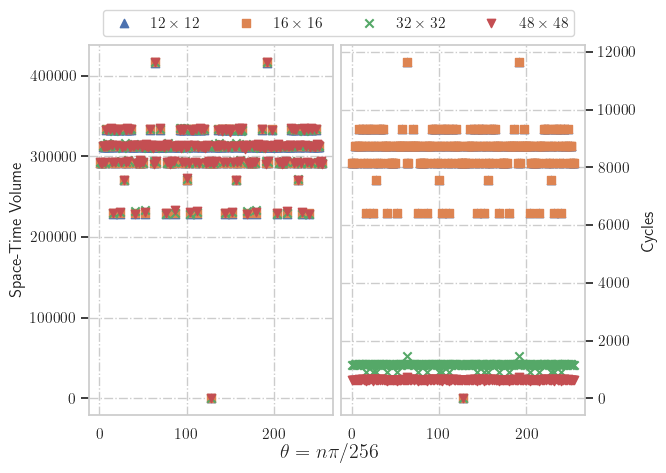

In [18]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

styles = {8:{'marker':'*'},
 12: {'marker':'^'},
 16: {'marker':'s'},
 32: {'marker':'x'},
 48: {'marker':'v'}
}

targets = qcb_sizes

#f, ax = plt.subplots(figsize=(7, 7))


sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#plt.grid(True,which="both")  


marks = ['', '.', 'x', '*']
linestyles = ['-', '--', ':']

target_label = 'distillation'
dependent = 'volume'
independent = 'height'
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

ax = [
    plt.subplot2grid((5, 10), (0, 0), colspan=5, rowspan=5),
    plt.subplot2grid((5, 10), (0, 5), colspan=5, rowspan=5)
]

subplot = ax[0]
kwargs = {
'errorbar':('ci', 100)
}

for i in targets:
    subplot.scatter(**plt_data(results_l2['size'], results_l2['angle'], results_l2['volume'], target=i), **styles[i], label=f'${i} \\times {i}$ QCB')

#subplot.legend_.remove()
subplot.yaxis.set_label_position("left")
subplot.yaxis.tick_left()
#subplot.set_yscale('log')
subplot.set_ylabel('Space-Time Volume')

# subplot.tick_params(
#     axis='x',
#     bottom=False,
#     top=False,
#     labelbottom=False
# )

subplot = ax[1]

for i in targets:
    subplot.scatter(**plt_data(results_l2['size'], results_l2['angle'], results_l2['runtime'], target=i), **styles[i], label=f'${i} \\times {i}$')

    
#subplot.legend_.remove()
subplot.yaxis.set_label_position("right")
subplot.yaxis.tick_right()
#subplot.set_yscale('log')
subplot.set_ylabel('Cycles')


fig = plt.gcf()
#fig.set_size_inches(7, 7)

lines = linestyles * 3
labels = sum(([f'DAG$_{target}$', f'Extern$_{target}$', f'CCZ$_{target}$'] for target in range(3)), start=list())

handles, labels = subplot.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper left', bbox_to_anchor=(0.134, 0.97), ncol=4)

fig.supxlabel('$\\theta = {n} \\pi  / {256}$')



#sbs.lineplot(x=results_extern['n_ctrl'], y=results_extern['volume'], label="Toffoli Extern")
#sbs.lineplot(x=results_ccz['n_ctrl'], y=results_ccz['volume'], label='Toffoli Factory', **ccz_style, marker='^')


#plt.title('Toffoli Runtimes for Various QCB Sizes')
#plt.xlabel('C$^{n}$X')
#plt.ylabel('Space-Time Volume')

#plt.yscale('log')

#plt.legend()

plt.savefig('rotations_2.pdf')

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

styles = {8:{'marker':'*'},
 12: {'marker':'^'},
 16: {'marker':'s'},
 32: {'marker':'x'},
 48: {'marker':'v'},
 64: {'marker':'v'}

}

targets = qcb_sizes

#f, ax = plt.subplots(figsize=(7, 7))


sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#plt.grid(True,which="both")  


marks = ['', '.', 'x', '*']
linestyles = ['-', '--', ':']

target_label = 'distillation'
dependent = 'volume'
independent = 'height'
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

ax = [
    plt.subplot2grid((5, 10), (0, 0), colspan=5, rowspan=5),
    plt.subplot2grid((5, 10), (0, 5), colspan=5, rowspan=5)
]

subplot = ax[0]
kwargs = {
'errorbar':('ci', 100)
}

for i in targets:
    subplot.scatter(**plt_data(results_l2['size'], results_l2['angle'], results_l2['volume'], target=i), **styles[i], label=f'${i} \\times {i}$ QCB')

#subplot.legend_.remove()
subplot.yaxis.set_label_position("left")
subplot.yaxis.tick_left()
#subplot.set_yscale('log')
subplot.set_ylabel('Space-Time Volume')

# subplot.tick_params(
#     axis='x',
#     bottom=False,
#     top=False,
#     labelbottom=False
# )

subplot = ax[1]

for i in targets:
    subplot.scatter(**plt_data(results_l2['size'], results_l2['angle'], results_l2['runtime'], target=i), **styles[i], label=f'${i} \\times {i}$')

    
#subplot.legend_.remove()
subplot.yaxis.set_label_position("right")
subplot.yaxis.tick_right()
#subplot.set_yscale('log')
subplot.set_ylabel('Cycles')


fig = plt.gcf()
#fig.set_size_inches(7, 7)

lines = linestyles * 3
labels = sum(([f'DAG$_{target}$', f'Extern$_{target}$', f'CCZ$_{target}$'] for target in range(3)), start=list())

handles, labels = subplot.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper left', bbox_to_anchor=(0.134, 0.97), ncol=4)

fig.supxlabel('$\\theta = {n} \\pi  / {256}$')



#sbs.lineplot(x=results_extern['n_ctrl'], y=results_extern['volume'], label="Toffoli Extern")
#sbs.lineplot(x=results_ccz['n_ctrl'], y=results_ccz['volume'], label='Toffoli Factory', **ccz_style, marker='^')


#plt.title('Toffoli Runtimes for Various QCB Sizes')
#plt.xlabel('C$^{n}$X')
#plt.ylabel('Space-Time Volume')

#plt.yscale('log')

#plt.legend()

plt.savefig('rotations_2.pdf')